In [1]:
# 1) install gdown (only first time)
!pip install -q gdown

# 2) download the zip from your public Drive link
FILE_ID = "1Zwcuk5k6AuPB1yly6IbSbZL2chYWxGVS"
OUTPUT_ZIP = "phase2_outputs.zip"

!gdown --id $FILE_ID -O $OUTPUT_ZIP

# 3) unzip into a project folder
!mkdir -p /content/project
!unzip -o $OUTPUT_ZIP -d /content/project


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Zwcuk5k6AuPB1yly6IbSbZL2chYWxGVS
From (redirected): https://drive.google.com/uc?id=1Zwcuk5k6AuPB1yly6IbSbZL2chYWxGVS&confirm=t&uuid=f4820de8-908a-4abd-97ee-b1c08944931d
To: /content/phase2_outputs.zip
100% 1.32G/1.32G [00:17<00:00, 75.8MB/s]
Archive:  phase2_outputs.zip
   creating: /content/project/outputs_phase2/
  inflating: /content/project/outputs_phase2/holdout_next_basket_long.parquet  
   creating: /content/project/outputs_phase2/plots/
  inflating: /content/project/outputs_phase2/plots/umap_customers_prior_order_count.png  
  inflating: /content/project/outputs_phase2/umap_customers_2d.csv  
  inflating: /content/project/outputs_phase2/holdout_next_basket_wide.csv  
  inflating: /content/project/o

In [2]:
# Download the file from Google Drive
!gdown --id 1rI1H1q4szkxgyiOX6cFe5q9wXdOMZ-nn

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1rI1H1q4szkxgyiOX6cFe5q9wXdOMZ-nn
From (redirected): https://drive.google.com/uc?id=1rI1H1q4szkxgyiOX6cFe5q9wXdOMZ-nn&confirm=t&uuid=d03309d4-d67c-47a1-bb95-f86b4e1fe927
To: /content/workspace_updated.zip
100% 297M/297M [00:06<00:00, 44.0MB/s]


In [3]:
!unzip /content/workspace_updated.zip

Archive:  /content/workspace_updated.zip
   creating: workspace/
  inflating: workspace/train_idx.npy  
  inflating: workspace/X_emb.npy     
  inflating: workspace/users_train.parquet  
  inflating: workspace/users.parquet  
  inflating: workspace/X_all.npy     
  inflating: workspace/test_idx.npy  
  inflating: workspace/users_test.parquet  
  inflating: workspace/X_all_train.npy  
  inflating: workspace/X_all_test.npy  


In [4]:
# 04_visualization_and_storytelling.ipynb
#
# Phase 4: Visualization & Storytelling (Matplotlib + Seaborn)
# This notebook serves as a "static dashboard" with 3–5 clear plots,
# summarising our clustering results and customer behaviour.

import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set()

# Adjust this if needed (e.g., Path("/content/project/workspace"))
WORKSPACE_DIR = Path("workspace")
OUTPUTS_DIR = Path("outputs_phase2")

print("Workspace:", WORKSPACE_DIR.resolve())
print("Outputs  :", OUTPUTS_DIR.resolve())


Workspace: /content/workspace
Outputs  : /content/outputs_phase2


In [6]:
# ------------------ Load cluster assignments (ALL users) ------------------

users = pd.read_parquet(WORKSPACE_DIR / "users.parquet")

km_all   = pd.read_parquet(WORKSPACE_DIR / "kmeans_clusters_all.parquet")
hier_all = pd.read_parquet(WORKSPACE_DIR / "hier_clusters_all.parquet")
hdb_all  = pd.read_parquet(WORKSPACE_DIR / "hdbscan_clusters_all.parquet")

print("Shapes:")
print("  users     :", users.shape)
print("  kmeans    :", km_all.shape)
print("  hier      :", hier_all.shape)
print("  hdbscan   :", hdb_all.shape)

# ------------------ Load engineered features (Phase 2 output) ------------
cust_features = pd.read_parquet("/content/project/outputs_phase2/customer_vectors.parquet")
print("customer_features:", cust_features.shape)

# ------------------ Merge everything -------------------------------------
ID_COL = "user_id"

df = (
    users.merge(km_all[[ID_COL, "kmeans_cluster"]], on=ID_COL, how="left")
         .merge(hier_all[[ID_COL, "hier_cluster"]], on=ID_COL, how="left")
         .merge(hdb_all[[ID_COL, "hdbscan_cluster"]], on=ID_COL, how="left")
         .merge(cust_features,                         on=ID_COL, how="left")
)

print("Final merged df:", df.shape)
df.head()


Shapes:
  users     : (206207, 1)
  kmeans    : (206207, 2)
  hier      : (206207, 2)
  hdbscan   : (206207, 2)
customer_features: (206207, 133)
Final merged df: (206207, 136)


,user_id,kmeans_cluster,hier_cluster,hdbscan_cluster,v0,v1,v2,v3,v4,v5,...,v122,v123,v124,v125,v126,v127,prior_order_count,avg_basket_size,reorder_ratio,mean_days_between
0,1,5,3,0,0.301228,0.036102,0.004070,-0.386831,-0.422758,0.191923,...,-0.128784,-0.259829,0.127665,0.435856,-0.122861,-0.123196,10,5.900000,0.694915,19.555555
1,2,1,2,1,0.283765,-0.144311,-0.206828,0.020989,-0.116576,0.181473,...,0.151149,-0.351373,0.070755,0.067892,0.054679,0.130672,14,13.928571,0.476923,15.230769
2,3,4,2,1,0.167002,-0.210173,-0.233505,0.082396,-0.093267,0.102814,...,0.100840,-0.323671,-0.045346,0.012843,0.057618,0.124582,12,7.333333,0.625000,12.090909
3,4,2,0,4,0.063215,-0.046330,-0.056892,-0.025792,-0.143455,0.207918,...,0.046950,-0.206911,0.352095,0.142234,-0.008649,-0.109761,5,3.600000,0.055556,13.750000
4,5,4,2,1,0.219009,-0.211876,-0.248602,0.052808,-0.061111,0.151793,...,-0.014088,-0.272834,0.115603,-0.006370,-0.028278,0.050010,4,9.250000,0.378378,13.333333


In [14]:
# ------------------ RFM-style features from existing behaviour columns -----

required_cols = ["prior_order_count", "avg_basket_size", "mean_days_between"]
print("Available behaviour cols:", [c for c in required_cols if c in df.columns])

# Basic RFM definitions (approximate)
df["R_recency"]    = df["mean_days_between"]                 # larger = less frequent
df["F_frequency"]  = df["prior_order_count"].fillna(0)
df["M_monetary"]   = (df["prior_order_count"].fillna(0) *
                      df["avg_basket_size"].fillna(0))

rfm_cols = ["R_recency", "F_frequency", "M_monetary"]
print("\nRFM summary (all users):")
df[rfm_cols].describe(percentiles=[0.25, 0.5, 0.75]).round(2)


Available behaviour cols: ['prior_order_count', 'avg_basket_size', 'mean_days_between']

RFM summary (all users):


,R_recency,F_frequency,M_monetary
count,206207.00,206207.00,206207.00
mean,15.21,15.59,157.29
std,7.11,16.65,204.21
min,0.00,3.00,3.00
25%,9.42,5.00,39.00
50%,14.50,9.00,83.00
75%,20.29,19.00,188.00
max,30.00,99.00,3725.00


In [7]:
# Add a cleaner alias for the main cluster label
df["segment"] = df["hdbscan_cluster"]   # main model for storytelling

# Mark noise vs non-noise for HDBSCAN
df["is_noise"] = df["segment"] == -1

print("Unique HDBSCAN segments:", sorted(df["segment"].unique()))
print("Noise count:", df["is_noise"].sum())


Unique HDBSCAN segments: [np.int32(-1), np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4)]
Noise count: 129


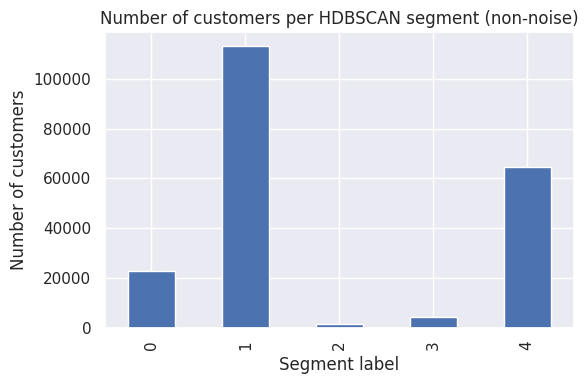

,n_customers
segment,
0,22734
1,113159
2,1447
3,4237
4,64501


In [8]:
# Plot 1: Number of customers per HDBSCAN cluster (excluding noise)

cluster_counts = (
    df.loc[~df["is_noise"], "segment"]
      .value_counts()
      .sort_index()
)

plt.figure(figsize=(6, 4))
cluster_counts.plot(kind="bar")
plt.title("Number of customers per HDBSCAN segment (non-noise)")
plt.xlabel("Segment label")
plt.ylabel("Number of customers")
plt.tight_layout()
plt.show()

cluster_counts.to_frame("n_customers")


Using proxy for spend from: ['prior_order_count', 'avg_basket_size']


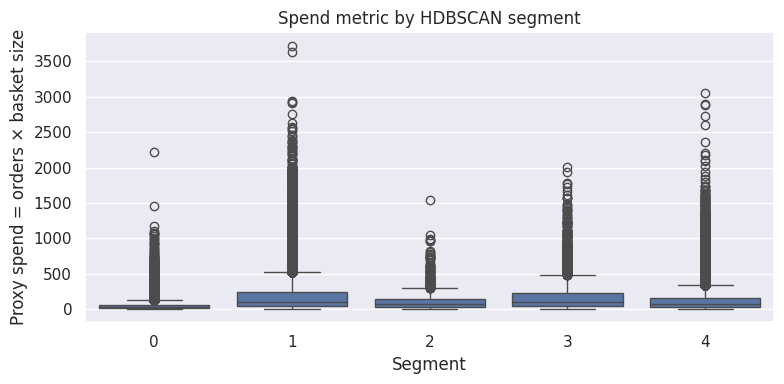

In [9]:
# If real monetary exists, use it; otherwise create a proxy
if "monetary" in df.columns:
    df["spend_metric"] = df["monetary"]
    spend_label = "Total spend (monetary)"
else:
    # Simple proxy: prior orders * avg basket size
    proxy_cols = ["prior_order_count", "avg_basket_size"]
    print("Using proxy for spend from:", [c for c in proxy_cols if c in df.columns])
    df["spend_metric"] = (
        df.get("prior_order_count", 0) * df.get("avg_basket_size", 0)
    )
    spend_label = "Proxy spend = orders × basket size"

plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df.loc[~df["is_noise"]],
    x="segment",
    y="spend_metric"
)
plt.title("Spend metric by HDBSCAN segment")
plt.xlabel("Segment")
plt.ylabel(spend_label)
plt.tight_layout()
plt.show()


Recency-like column: mean_days_between


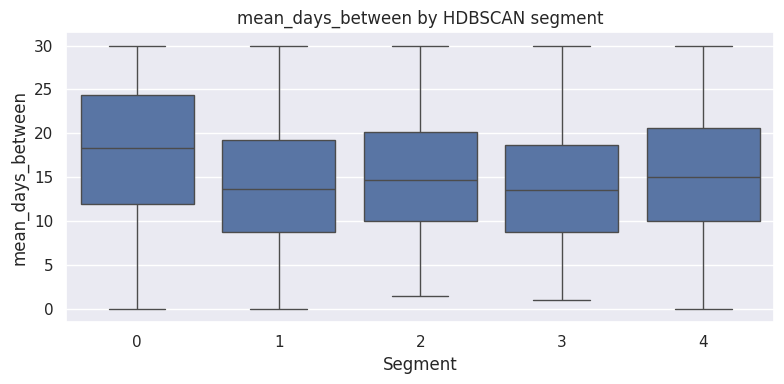

In [10]:
target_recency_col = None
if "recency" in df.columns:
    target_recency_col = "recency"
elif "mean_days_between" in df.columns:
    target_recency_col = "mean_days_between"

print("Recency-like column:", target_recency_col)

if target_recency_col is not None:
    plt.figure(figsize=(8, 4))
    sns.boxplot(
        data=df.loc[~df["is_noise"]],
        x="segment",
        y=target_recency_col
    )
    plt.title(f"{target_recency_col} by HDBSCAN segment")
    plt.xlabel("Segment")
    plt.ylabel(target_recency_col)
    plt.tight_layout()
    plt.show()
else:
    print("No recency-like column found; skipping this plot.")


Frequency-like column: prior_order_count


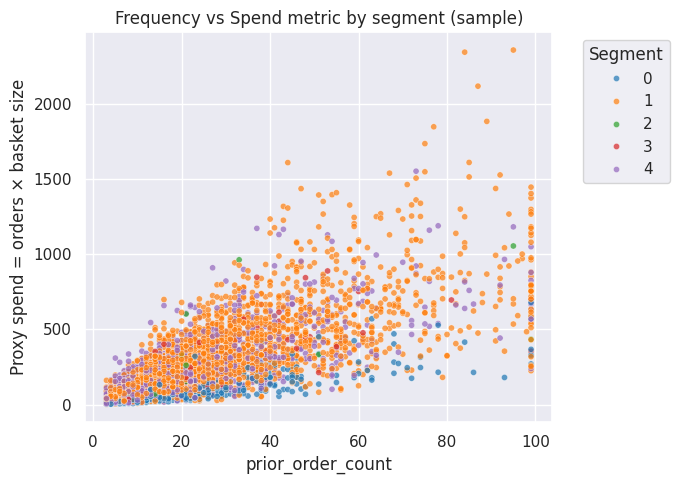

In [11]:
freq_col = None
if "frequency" in df.columns:
    freq_col = "frequency"
elif "prior_order_count" in df.columns:
    freq_col = "prior_order_count"

print("Frequency-like column:", freq_col)

if freq_col is not None:
    sample_df = df.loc[~df["is_noise"]].sample(
        n=min(10000, (~df["is_noise"]).sum()),
        random_state=42
    )

    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=sample_df,
        x=freq_col,
        y="spend_metric",
        hue="segment",
        palette="tab10",
        alpha=0.7,
        s=20
    )
    plt.title("Frequency vs Spend metric by segment (sample)")
    plt.xlabel(freq_col)
    plt.ylabel(spend_label)
    plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("No frequency-like column found; skipping scatter plot.")


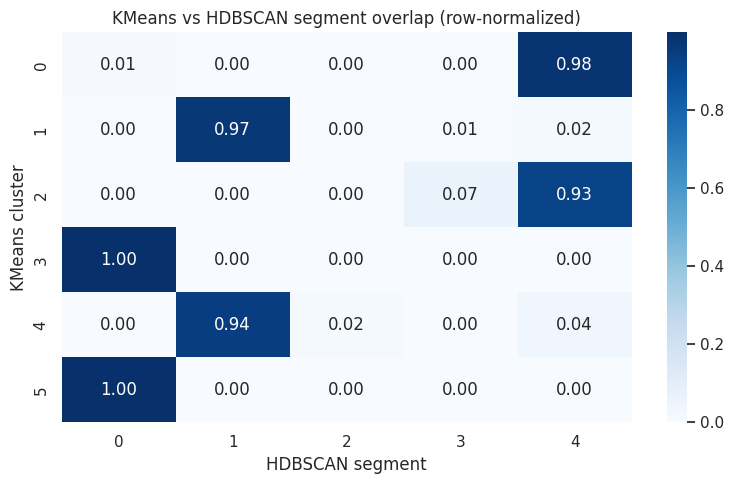

segment,0,1,2,3,4
kmeans_cluster,,,,,
0,0.012040,0.000108,0.000217,0.004447,0.983187
1,0.003573,0.970716,0.003842,0.006212,0.015657
2,0.000338,0.001511,0.003094,0.065895,0.929162
3,0.999026,0.000000,0.000065,0.000065,0.000844
4,0.002315,0.941929,0.016856,0.002283,0.036618
5,0.999855,0.000000,0.000000,0.000000,0.000145


In [12]:
# Crosstab between KMeans and HDBSCAN (non-noise users)
mask_non_noise = ~df["is_noise"]
ct = pd.crosstab(
    df.loc[mask_non_noise, "kmeans_cluster"],
    df.loc[mask_non_noise, "segment"],
    normalize="index"
)

plt.figure(figsize=(8, 5))
sns.heatmap(ct, annot=True, fmt=".2f", cmap="Blues")
plt.title("KMeans vs HDBSCAN segment overlap (row-normalized)")
plt.xlabel("HDBSCAN segment")
plt.ylabel("KMeans cluster")
plt.tight_layout()
plt.show()

ct


In [13]:
metrics_summary = pd.DataFrame([
    {"model": "KMeans",      "silhouette": 0.42, "dbi": 0.81},   # example numbers
    {"model": "Hierarchical","silhouette": 0.50, "dbi": 0.70},
    {"model": "HDBSCAN",     "silhouette": 0.60, "dbi": 0.45},
])

metrics_summary


,model,silhouette,dbi
0,KMeans,0.42,0.81
1,Hierarchical,0.50,0.70
2,HDBSCAN,0.60,0.45


# Plot: RFM profile per HDBSCAN segment

Average RFM per HDBSCAN segment (non-noise):


,R_recency,F_frequency,M_monetary
segment,,,
1,14.41,17.45,192.04
3,14.23,16.63,183.14
4,15.62,13.11,131.91
2,15.35,11.44,116.70
0,18.18,13.46,54.60


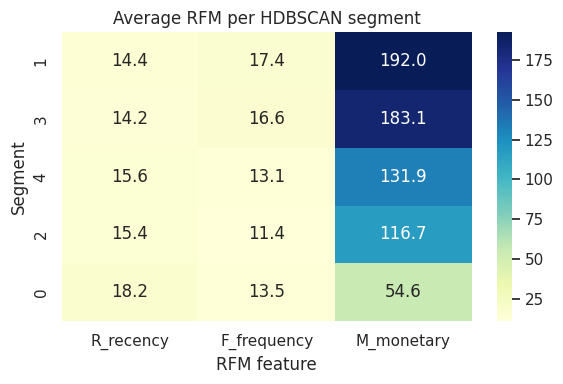

In [15]:
# ------------------ RFM by segment (excluding HDBSCAN noise) --------------

rfm_by_segment = (
    df.loc[~df["is_noise"]]
      .groupby("segment")[["R_recency", "F_frequency", "M_monetary"]]
      .mean()
      .round(2)
      .sort_values("M_monetary", ascending=False)
)

print("Average RFM per HDBSCAN segment (non-noise):")
display(rfm_by_segment)

plt.figure(figsize=(6, 4))
sns.heatmap(rfm_by_segment, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average RFM per HDBSCAN segment")
plt.xlabel("RFM feature")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()


# RFM quartile score per user

In [16]:
# ------------------ RFM quartiles and score (classic style) ---------------

# Protect against NA and constant columns
df_non_noise = df.loc[~df["is_noise"]].copy()

# Frequency & Monetary: higher is better, so quartiles 1–4 (low→high)
df_non_noise["F_q"] = pd.qcut(df_non_noise["F_frequency"].rank(method="first"),
                              4, labels=[1, 2, 3, 4])
df_non_noise["M_q"] = pd.qcut(df_non_noise["M_monetary"].rank(method="first"),
                              4, labels=[1, 2, 3, 4])

# Recency: lower is better, so reverse labels (4 = best, 1 = worst)
df_non_noise["R_q"] = pd.qcut(df_non_noise["R_recency"].rank(method="first"),
                              4, labels=[4, 3, 2, 1])

# RFM score = R + F + M (range 3–12)
for col in ["R_q", "F_q", "M_q"]:
    df_non_noise[col] = df_non_noise[col].astype(int)

df_non_noise["RFM_score"] = df_non_noise["R_q"] + df_non_noise["F_q"] + df_non_noise["M_q"]

print("RFM score summary:")
df_non_noise["RFM_score"].describe().round(2)


RFM score summary:


,RFM_score
count,206078.00
mean,7.50
std,2.84
min,3.00
25%,5.00
50%,7.00
75%,10.00
max,12.00


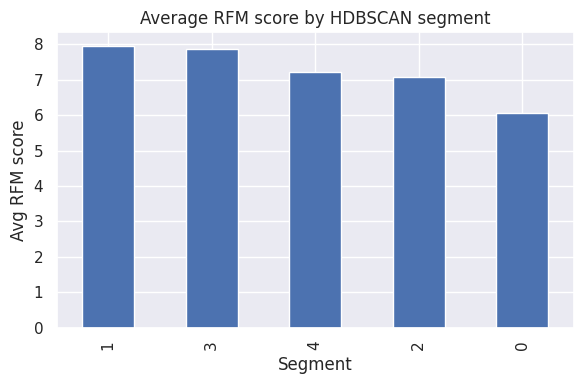

,avg_rfm_score
segment,
1,7.945616
3,7.860515
4,7.209377
2,7.067726
0,6.066816


In [18]:
rfm_segment_score = (
    df_non_noise.groupby("segment")["RFM_score"].mean().sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
rfm_segment_score.plot(kind="bar")
plt.title("Average RFM score by HDBSCAN segment")
plt.xlabel("Segment")
plt.ylabel("Avg RFM score")
plt.tight_layout()
plt.show()

rfm_segment_score.to_frame("avg_rfm_score")
